In [68]:
import sys
import os

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd

sys.path.insert(0, "../src/")

from landprice_merger import (
    zensus_landprice_merger,
    landprice_neighborhood_merger,
    combine_landprice_with_geodata,
)
from csv_merger import combine_csvs
from principal_component_analysis import combine_PCA_datasets


In [13]:
cities = ["Berlin", "Bremen", "Dresden", "Frankfurt", "Köln"]

main_path = os.path.join(os.getcwd(), "..")

path_zensus = os.path.join(main_path, "res", "data", "DLR", "2 Zensus")
path_land = os.path.join(main_path, "res", "data", "DLR", "1 Land Prices")
path_neigh = os.path.join(main_path, "res", "data", "DLR", "3 Neighborhoods")


In [14]:
df_zensus = combine_csvs(str_path=path_zensus)

gdf_zensus = combine_PCA_datasets(
    df_zensus=df_zensus, str_city=cities[0], str_path=path_zensus
)


In [15]:
df_land_prices = combine_csvs(str_path=path_land)

gdf_landprices = combine_landprice_with_geodata(
    df_landprice=df_land_prices, str_city=cities[0], str_path=path_land
)

gdf_landprices_names = landprice_neighborhood_merger(
    gdf_landprice=gdf_landprices, str_city=cities[0], str_path_neigh=path_neigh
)


In [16]:
result = zensus_landprice_merger(
    gdf_landprices=gdf_landprices_names, gdf_zensus=gdf_zensus
)


In [17]:
result.head()


,Grid_Code,City_Code,geometry,families_total_units,famk_couple_children_more_18,famk_reg_partner_wout_child,famk_reg_partner_1_child_less_18,famk_reg_partner_children_more_18,famk_nonmarital_wout_child,famk_nonmarital_children_more_18,...,ForestryArea,GreenArea,IndustrialArea,MixedUseArea,OtherSpecialArea,Residential,SpecialUseArea,Village,Neighborhood_Name,District_Name
0,100mN32539E45693,11000000,"POLYGON ((4569300.000 3253900.000, 4569300.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,Schmöckwitz,Treptow-Köpenick
1,100mN32539E45694,11000000,"POLYGON ((4569400.000 3253900.000, 4569400.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,Schmöckwitz,Treptow-Köpenick
2,100mN32539E45695,11000000,"POLYGON ((4569500.000 3253900.000, 4569500.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,Schmöckwitz,Treptow-Köpenick
3,100mN32539E45696,11000000,"POLYGON ((4569600.000 3253900.000, 4569600.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,Schmöckwitz,Treptow-Köpenick
4,100mN32540E45692,11000000,"POLYGON ((4569200.000 3254000.000, 4569200.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,Schmöckwitz,Treptow-Köpenick


In [18]:
result.shape


(96838, 92)

<Axes: >

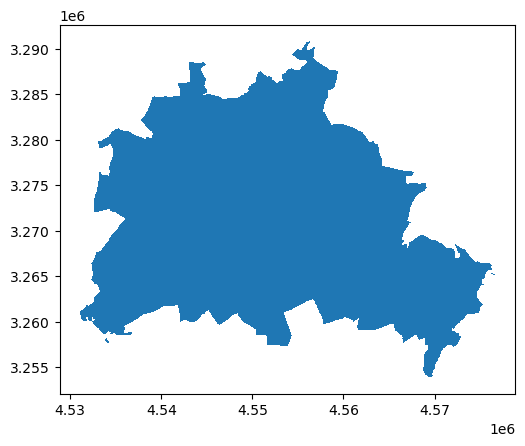

In [19]:
result.geometry.plot()


In [20]:
# result.to_csv("../res/data/Berlin_landprices.csv")


In [21]:
result.columns


Index(['Grid_Code', 'City_Code', 'geometry', 'families_total_units',
       'famk_couple_children_more_18', 'famk_reg_partner_wout_child',
       'famk_reg_partner_1_child_less_18', 'famk_reg_partner_children_more_18',
       'famk_nonmarital_wout_child', 'famk_nonmarital_children_more_18',
       'famk_fathers_1_child_less_18', 'famk_fathers_children_more_18',
       'famk_mothers_children_more_18', 'famgr_5_pers', 'famgr_6_more', 'City',
       'population_total_units', 'al_80_over', 'fam_civil_partner_deceased',
       'fam_civil_partner_dissolved', 'fam_unknown', 'geb_other', 'sh_bosnia',
       'sh_greece', 'sh_italy', 'sh_kazakhstan', 'sh_croatia',
       'sh_netherlands', 'sh_poland', 'sh_romania', 'sh_russia', 'sh_ukraine',
       'sz_mult_foreign_only', 'sz_unknown', 'buildings_total_units',
       'n_owned_without_current_household',
       'n_rented_without_current_household', 'n_vacant',
       'we_private_individuals', 'we_private_companies_legal_entities',
       'we_publ

In [35]:
result.Land_Value.describe()


count    96838.000000
mean      1402.448081
std       1578.846544
min        260.100000
25%        581.600000
50%        770.500000
75%       1484.000000
max       9238.700000
Name: Land_Value, dtype: float64

In [30]:
X = result[["households_total_units", "families_total_units"]]
y = result.Land_Value
reg = LinearRegression().fit(X, y)


In [31]:
reg.score(X, y)


0.10934902374824162

In [32]:
reg.coef_


array([ 24.6285604 , -32.79191782])

In [33]:
reg.intercept_


1217.7894947596337

In [61]:
result_plotting = result[
    result.columns[
        ~result.columns.isin(
            [
                "Grid_Code",
                "City_Code",
                "geometry",
                "City",
                "index_right",
                "Neighborhood_FID",
                "Area_Types",
                "Area_Count",
                "City_Name",
                "Neighborhood_Name",
                "District_Name",
            ]
        )
    ]
]


In [82]:
corr = result_plotting.corr()
matrix = np.triu(corr)


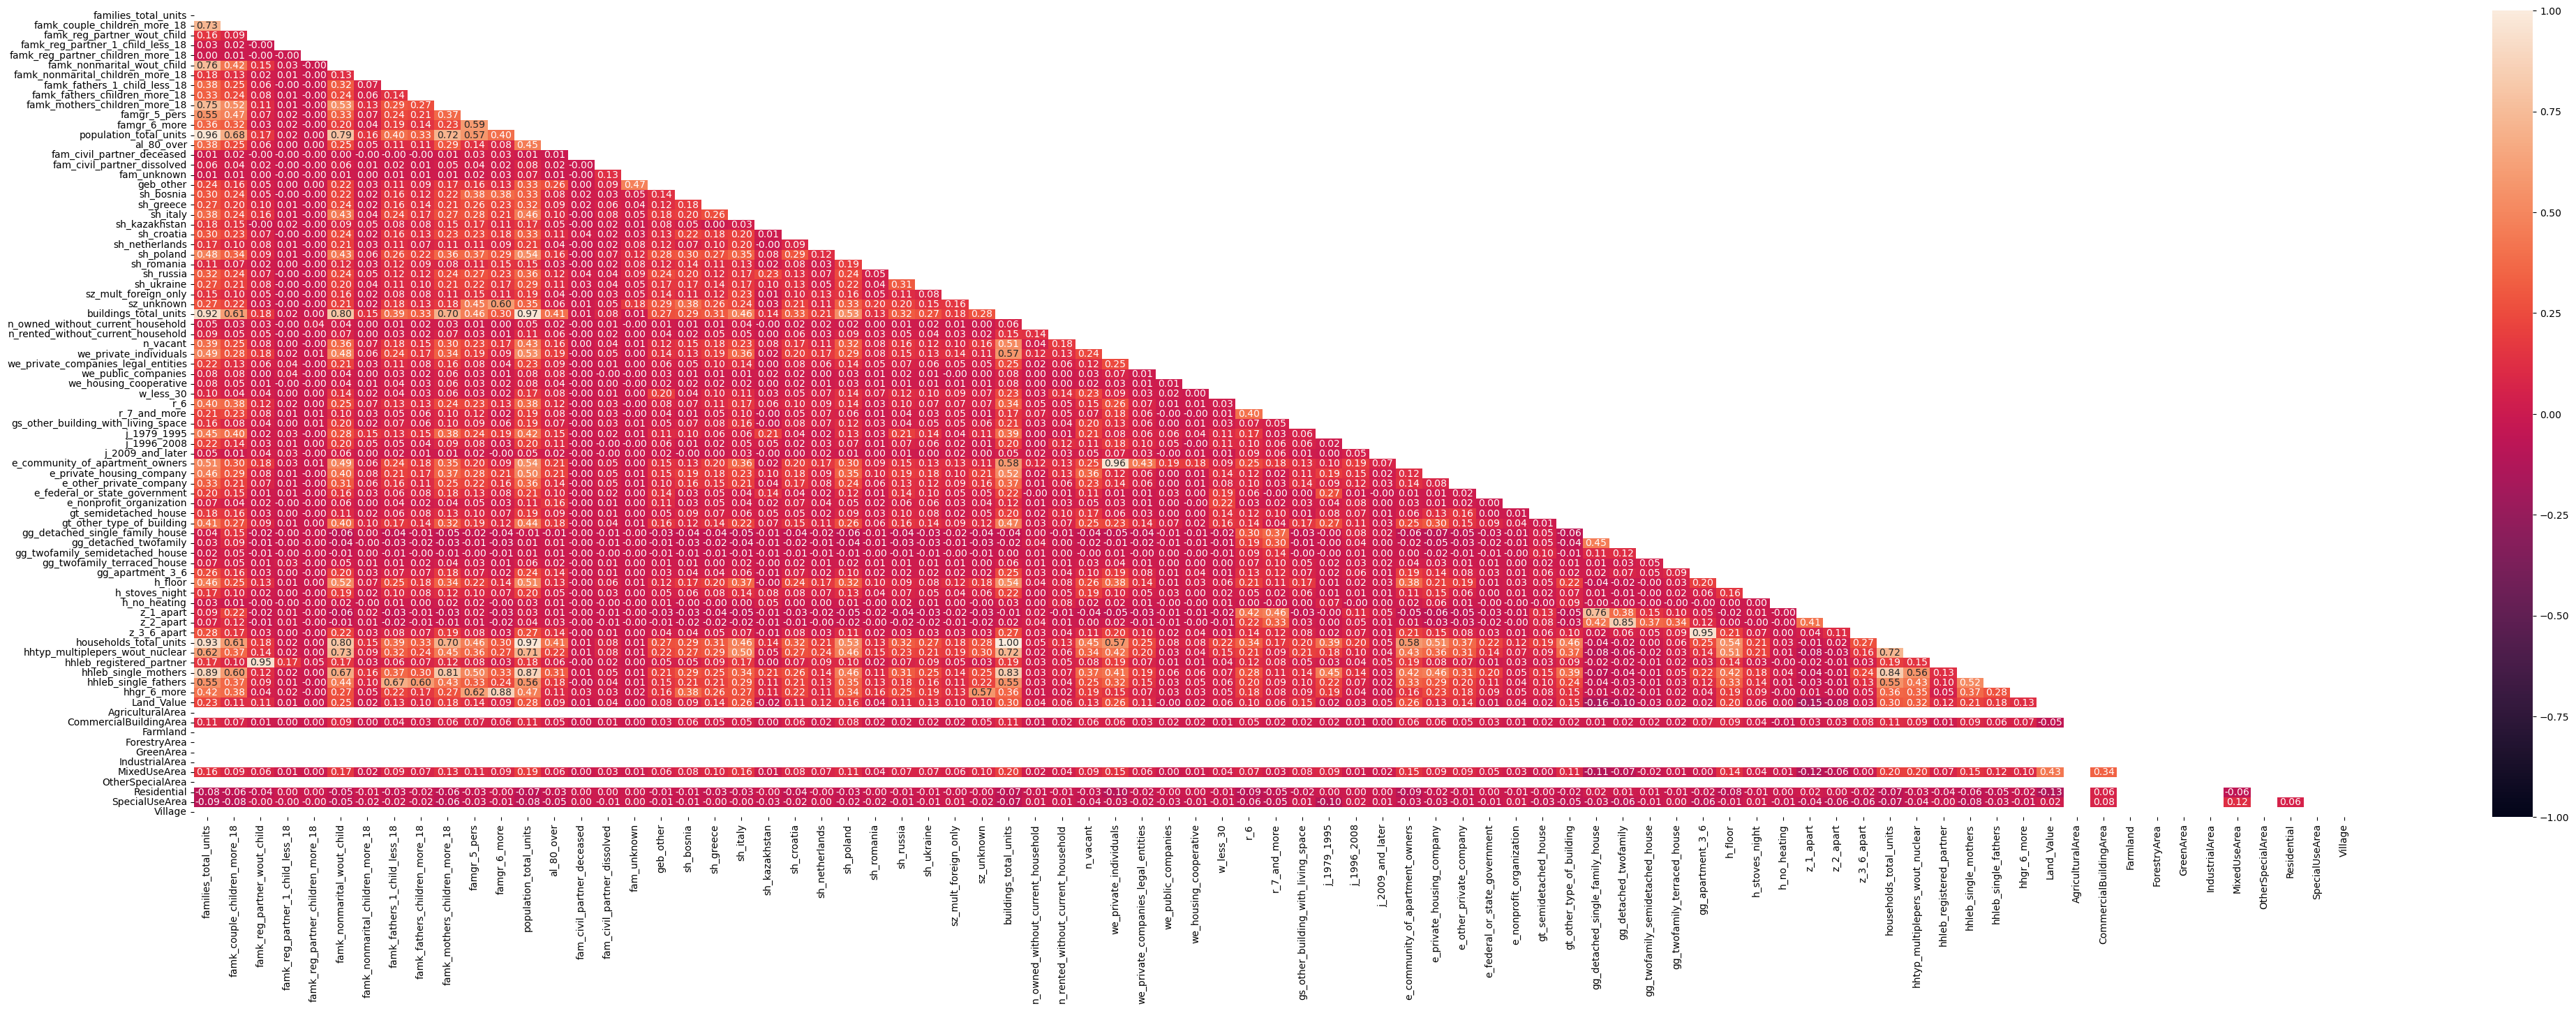

In [84]:
fig, ax = plt.subplots()
fig.set_size_inches(50, 15)
ax = sns.heatmap(corr, annot=True, fmt=".2f", mask=matrix, vmin=-1, vmax=1)


In [97]:
corr = result_plotting.corr()
corr_selection = corr[(corr > 0.5) | (corr < -0.1)]
matrix = np.triu(corr)


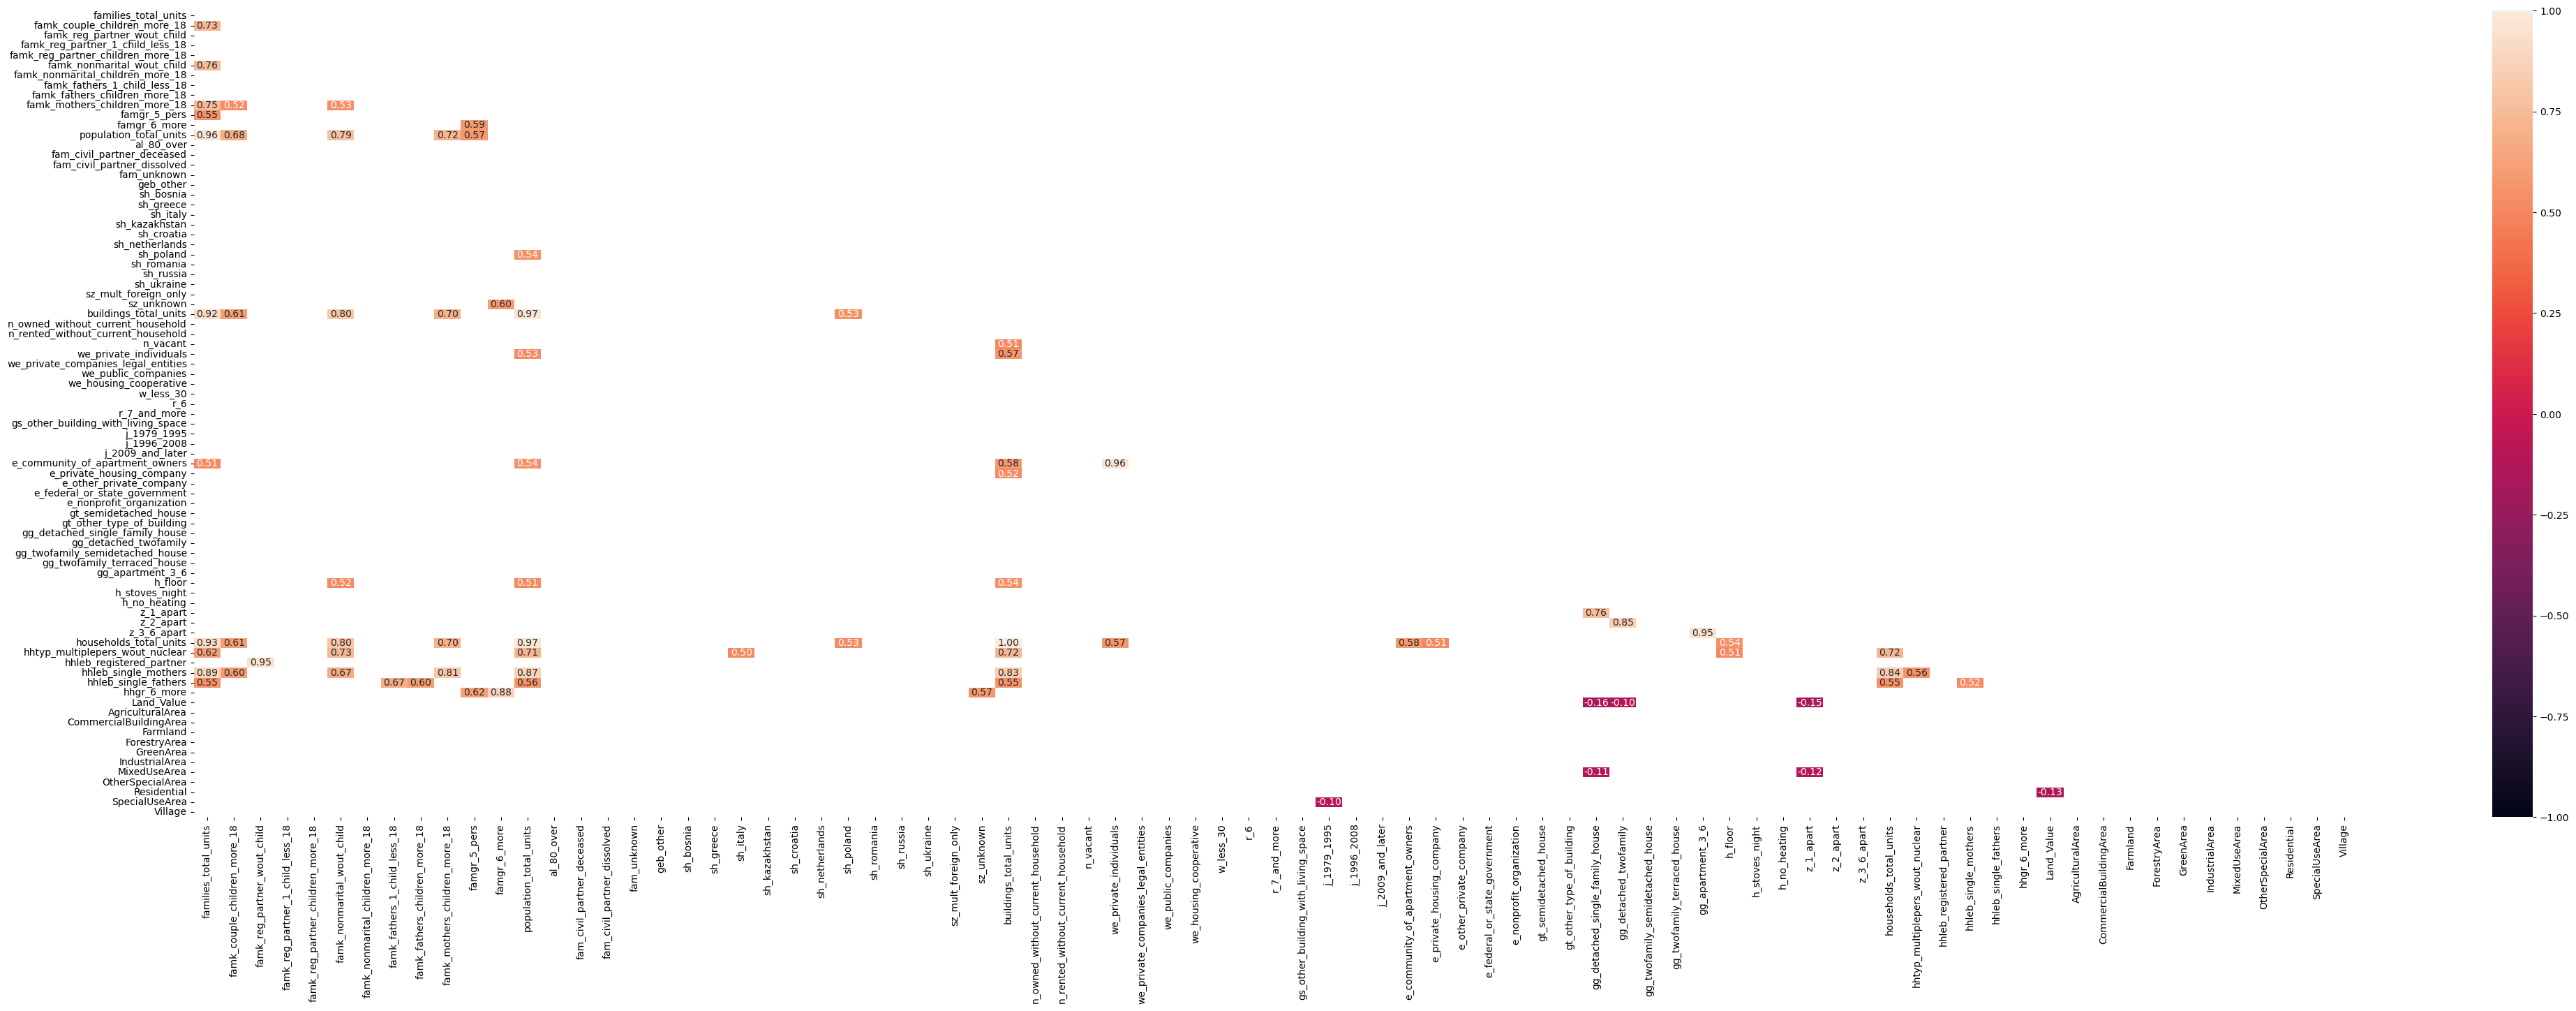

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(50, 15)
ax = sns.heatmap(corr_selection, annot=True, fmt=".2f", mask=matrix, vmin=-1, vmax=1)


In [103]:
corr


,families_total_units,famk_couple_children_more_18,famk_reg_partner_wout_child,famk_reg_partner_1_child_less_18,famk_reg_partner_children_more_18,famk_nonmarital_wout_child,famk_nonmarital_children_more_18,famk_fathers_1_child_less_18,famk_fathers_children_more_18,famk_mothers_children_more_18,...,CommercialBuildingArea,Farmland,ForestryArea,GreenArea,IndustrialArea,MixedUseArea,OtherSpecialArea,Residential,SpecialUseArea,Village
families_total_units,1.000000,0.726252,0.156309,0.025512,0.004862,0.757007,0.175016,0.380279,0.332505,0.748076,...,0.105793,NaN,NaN,NaN,NaN,0.155081,NaN,-0.076122,-0.086933,NaN
famk_couple_children_more_18,0.726252,1.000000,0.090004,0.018144,0.006346,0.422804,0.129248,0.247879,0.242581,0.523468,...,0.073378,NaN,NaN,NaN,NaN,0.090765,NaN,-0.060596,-0.077263,NaN
famk_reg_partner_wout_child,0.156309,0.090004,1.000000,-0.000775,-0.000207,0.152827,0.024298,0.059263,0.075385,0.113728,...,0.012482,NaN,NaN,NaN,NaN,0.064689,NaN,-0.037914,-0.003619,NaN
famk_reg_partner_1_child_less_18,0.025512,0.018144,-0.000775,1.000000,-0.000039,0.030708,0.011872,-0.001739,0.007116,0.005893,...,0.003008,NaN,NaN,NaN,NaN,0.008606,NaN,0.000542,-0.000750,NaN
famk_reg_partner_children_more_18,0.004862,0.006346,-0.000207,-0.000039,1.000000,-0.001124,-0.000216,-0.000465,-0.000414,-0.001046,...,0.002266,NaN,NaN,NaN,NaN,0.004203,NaN,0.000145,-0.003952,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MixedUseArea,0.155081,0.090765,0.064689,0.008606,0.004203,0.170767,0.020840,0.091562,0.073247,0.129064,...,0.337792,NaN,NaN,NaN,NaN,1.000000,NaN,-0.058898,0.123442,NaN
OtherSpecialArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residential,-0.076122,-0.060596,-0.037914,0.000542,0.000145,-0.054006,-0.007148,-0.034693,-0.022595,-0.057404,...,0.063864,NaN,NaN,NaN,NaN,-0.058898,NaN,1.000000,0.055381,NaN
SpecialUseArea,-0.086933,-0.077263,-0.003619,-0.000750,-0.003952,-0.051015,-0.021010,-0.020988,-0.017491,-0.063398,...,0.078004,NaN,NaN,NaN,NaN,0.123442,NaN,0.055381,1.000000,NaN


In [104]:
abs(corr.Land_Value) > 0.1


families_total_units                  True
famk_couple_children_more_18          True
famk_reg_partner_wout_child           True
famk_reg_partner_1_child_less_18     False
famk_reg_partner_children_more_18    False
                                     ...  
MixedUseArea                          True
OtherSpecialArea                     False
Residential                           True
SpecialUseArea                       False
Village                              False
Name: Land_Value, Length: 81, dtype: bool

In [111]:
corr.loc[abs(corr.Land_Value) > 0.25, abs(corr.Land_Value) > 0.25].columns


Index(['famk_nonmarital_wout_child', 'population_total_units', 'sh_italy',
       'buildings_total_units', 'we_private_individuals',
       'e_community_of_apartment_owners', 'households_total_units',
       'hhtyp_multiplepers_wout_nuclear', 'Land_Value', 'MixedUseArea'],
      dtype='object')